# Lagrange duality

A numerical example to illustrate the chapter on duality in the **Convex Optimization** book by **Boyd & Vandenberghe**.

PH — October 2014

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [369]:
from IPython.html.widgets import interact

In [97]:
from scipy import optimize as opt

In [7]:
%matplotlib inline

## 1. Problem definition

Optimization problem: 

\begin{equation}
\begin{split}
\min& \quad f_0(x)\\
s.t.& \quad f_i(x) ≤ 0, \quad i=1,...,m\\
    & \quad h_i(x) = 0, \quad i=1,...,p
\end{split}
\end{equation}

### Objective function

In [329]:
def objective(x):
    'objective function similar to the one on fig. 5.1'
    return 5*(x+0.8)*(x+0.2)*(x-0.5)*(x-0.6) + 2

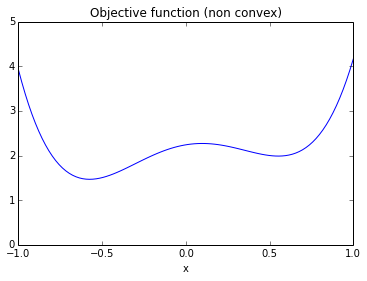

In [330]:
x_lin = np.linspace(-1, 1, 100)
plt.plot(x_lin, objective(x_lin))
plt.ylim(0, 5)
plt.title('Objective function (non convex)')
plt.xlabel('x');

### Inequality constraint

One constraint, which feasible set is [-0.46, 0.46]

In [351]:
def ineq_cons(x):
    'quadratic'
    return (x-0.46)*(x+0.46)

def ineq_cons(x):
    'absolute value'
    return np.abs(x) - 0.46

def ineq_cons(x):
    'non convex well'
    return (-1/np.cosh(4*x) + .31)*2

ineq_cons(0.46)

0.00035947299192884419

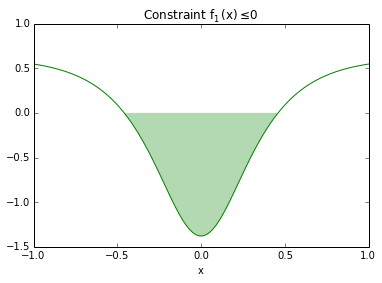

In [423]:
plt.plot(x_lin, ineq_cons(x_lin), 'g')
plt.fill_between(x_lin, ineq_cons(x_lin), 0, where=ineq_cons(x_lin)<=0,
                 linewidth=0, color='g', alpha=0.3)
plt.title('Constraint $f_1(x) \leq 0$')
plt.xlabel('x');

### Numerical optimization

In [353]:
res_nocons = opt.minimize(objective, x0=-0.5, bounds=[(-1., 1.)])
res_nocons

  status: 0
 success: True
    nfev: 18
     fun: array([ 1.46711902])
       x: array([-0.57512301])
 message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     jac: array([  9.32587341e-06])
     nit: 4

In [354]:
res = opt.minimize(objective, x0=-0.5, bounds=[(-1., 1.)], constraints={'type':'ineq', 'fun': lambda x: -ineq_cons(x)})
res

  status: 0
 success: True
    njev: 5
    nfev: 16
     fun: array([ 1.55041912])
       x: array([-0.4598475])
 message: 'Optimization terminated successfully.'
     jac: array([ 1.30104996,  0.        ])
     nit: 5

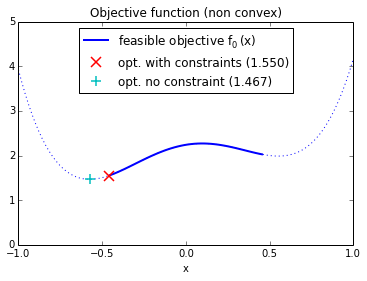

In [394]:
plt.plot(x_lin, objective(x_lin), ':')
plt.plot(x_lin,  np.ma.array(objective(x_lin), mask=ineq_cons(x_lin)> 0),
         label='feasible objective $f_0(x)$', lw=2, c='b')
plt.plot(res.x, res.fun, 'rx',
         label='opt. with constraints ({:.3f})'.format(res.fun[0]),
         markersize=10, markeredgewidth=1.5)
plt.plot(res_nocons.x, res_nocons.fun, 'c+',
         label='opt. no constraint ({:.3f})'.format(res_nocons.fun[0]),
         markersize=10, markeredgewidth=1.5)
plt.ylim(0, 5)
plt.title('Objective function (non convex)')
plt.legend(loc='upper center', numpoints=1)
plt.xlabel('x');

## 2. Lagrange dual function

### Lagrangian

$L: R^n × R^m × R^p → R$

$$L(x, \lambda, \nu) = f_0(x) + \sum_{i=1}^{m}\lambda_i f_i(x) + \sum_{i=1}^{p}\nu_i h_i(x)$$

In our case: $n=1$, $m=1$ and $p=0$

$$L(x, \lambda) = f_0(x) + \lambda_1 f_1(x)$$

In [356]:
def lagrange(x, l1):
    return objective(x) + l1*ineq_cons(x)

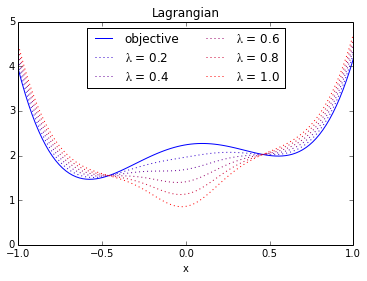

In [399]:
plt.plot(x_lin, objective(x_lin), label='objective')
for l in np.arange(0.2, 1.01, 0.2):
    c = (l, 0, 1-l)
    plt.plot(x_lin, lagrange(x_lin, l), ':',
             color=c, 
             label='$\lambda$ = {:.1f}'.format(l))
plt.ylim(0, 5)
plt.title('Lagrangian')
plt.legend(loc='upper center', ncol=2)
plt.xlabel('x');

Warning: there can be local minima in the Lagrangian!

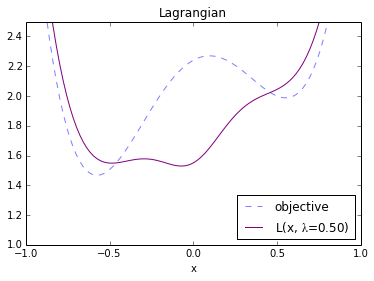

In [401]:
@interact(l1=(0., 1.))
def lagrange_plot(l1=0.5):
    plt.plot(x_lin, objective(x_lin), 'b--', label='objective', alpha=0.5)
    c = (l1, 0, 1-l1)
    plt.plot(x_lin, lagrange(x_lin, l1), color=c, label=u'L(x, $\lambda$={:.2f})'.format(l1))
    plt.title('Lagrangian')
    plt.legend(loc='lower right');
    plt.xlabel('x');
    plt.ylim(1., 2.5)

### Lagrange dual function

$$ g(\lambda, \nu) = \inf_{x\in D} L(x, \lambda, \nu)$$

Property:

* the dual function $g$ is always **concave**, as the *pointwise infimum* of a familly of affine (concave) functions

In [376]:
def dual(l):
    'compute the dual function with numerical optim'
    L_min = []
    # Multi start scalar optimization
    for x0 in [-0.5, -0.4, -0.3, -0.2, -0.1, 0.]:
        res = opt.minimize(lambda x: lagrange(x, l), x0=x0)
        L_min.append(res.fun)
    
    return np.min(L_min)

dual = np.vectorize(dual)

dual([0, 0.5, 1])

array([ 1.46711902,  1.52916968,  0.85246398])

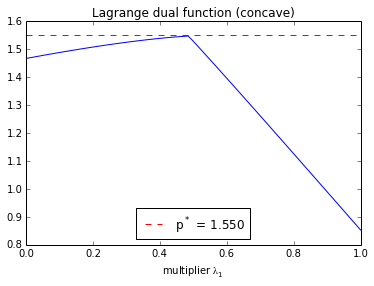

In [389]:
l_lin = np.linspace(0, 1, 100)

def plot_dual(l_lin):
    plt.plot(l_lin, dual(l_lin))
    plt.hlines(res.fun, l_lin[0], l_lin[-1], color='r', linestyles='dashed',
               label='$p^*$ = {:.3f}'.format(res.fun[0]))

    plt.title('Lagrange dual function (concave)')
    plt.legend(loc='lower center')
    plt.xlabel('multiplier $\lambda_1$')

plot_dual(l_lin)

### Optimal duality gap

find the maximum of the dual function (the "Lagrange dual problem", §5.2)

\begin{equation}
\begin{split}
\max& \quad g(\lambda, \nu)\\
s.t.& \quad \lambda \succeq 0
\end{split}
\end{equation}

In [421]:
res_dual = opt.minimize(lambda l: -dual(l), x0= 0.5, method='Nelder-Mead')
dual_max = -res_dual.fun
res_dual

  status: 0
    nfev: 28
 success: True
     fun: -1.5477210789759182
       x: array([ 0.48554688])
 message: 'Optimization terminated successfully.'
     nit: 14

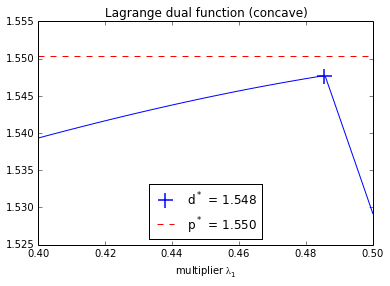

In [422]:
l_lin = np.linspace(0.40, 0.5, 100)
plot_dual(l_lin)
plt.plot(res_dual.x, dual_max, 'b+',
         label='$d^*$ = {:.3f}'.format(dual_max),
         markersize=15, markeredgewidth=1.5)
plt.legend(loc='lower center', numpoints=1)

Dual optimality gap:

In [419]:
res.fun[0] - dual_max

0.0026980407967343023

Observation: the gap is non zero, but no that big either...